In [50]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os


Populating the interactive namespace from numpy and matplotlib


In [72]:
df=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201504_data.csv',parse_dates=['starttime'])  ##parse date as date
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

# NUll Hypothesis : The two samples i.e age of males and age of females are from the same distributions, level of significance alpha = .05

In [52]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

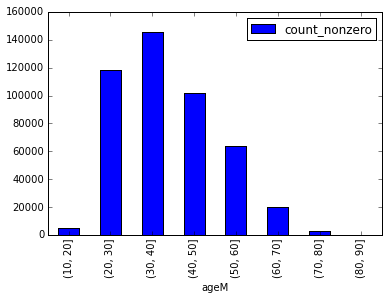

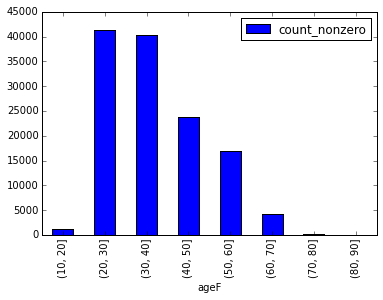

In [53]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001449
(20, 30]       0.061914
(30, 40]       0.058789
(40, 50]       0.020863
(50, 60]       0.014038
(60, 70]       0.003639
(70, 80]       0.000023
(80, 90]       0.000000


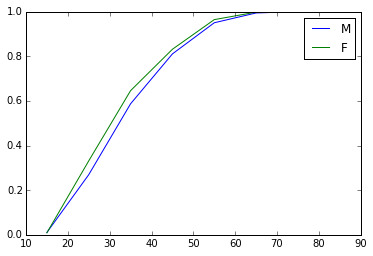

In [54]:
#Calculating the cumulative distribution function .

csM=df.ageM[~np.isnan(df['ageM'])].groupby(pd.cut(df.ageM[~np.isnan(df['ageM'])], bins)).agg([count_nonzero]).cumsum()

csF=df.ageF[~np.isnan(df['ageF'])].groupby(pd.cut(df.ageF[~np.isnan(df['ageF'])], bins)).agg([count_nonzero]).cumsum() #.plot(kind='bar')  

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [55]:
import scipy.stats

In [56]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

In [57]:
ks

(0.50452949922592316, 0.0)

#Kstatic value = 0.50452949922592316  and p value = 0.0

# observation from KS test : Since the value of P is 0.0, the null hypothesis can be rejected , hence the two sample are not from the same distribution. 

# Pearson's test for correlation

In [58]:
j=0  ##getting the male sample 
a=[]
for i in df.ageM[~np.isnan(df['ageM'])]:
    a.append(i)
    j+=1
    if (j==5000):
        break
    

In [59]:
j=0  ##getting the male sample 
b=[]
for i in df.ageM[~np.isnan(df['ageM'])]:
    b.append(i)
    j+=1
    if (j==5000):
        break
    

In [60]:
i=scipy.stats.pearsonr(a,b)

In [61]:
i

(1.0, 0.0)

# OBSERVATION : the pearson value of r is 1 which suggest that the two samples are  corelated.

Spearman's test for correlation

In [69]:
i=scipy.stats.spearmanr(a,b)

In [70]:
i

(1.0, 0.0)

# The value of 1 indicates that there is a corelation between the two sample values . 

# Working for the part of age  in day vs age in night.


In [93]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour <18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour >=18)]

In [96]:
len(df.ageD[~np.isnan(df['ageD'])])   ##no.of day riders

424520

In [97]:
len(df.ageN[~np.isnan(df['ageN'])])   ##no. of night riders

161653

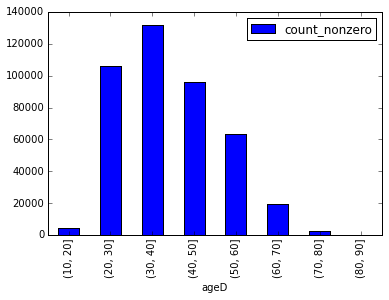

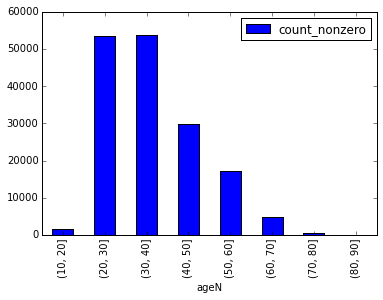

In [98]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.000073
(20, 30]       0.081507
(30, 40]       0.103686
(40, 50]       0.061377
(50, 60]       0.017962
(60, 70]       0.002995
(70, 80]       0.000045
(80, 90]       0.000000


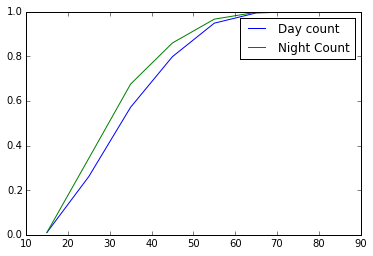

In [100]:
#Calculating the cumulative distribution function .

csD=df.ageD[~np.isnan(df['ageD'])].groupby(pd.cut(df.ageD[~np.isnan(df['ageD'])], bins)).agg([count_nonzero]).cumsum()

csN=df.ageN[~np.isnan(df['ageN'])].groupby(pd.cut(df.ageN[~np.isnan(df['ageN'])], bins)).agg([count_nonzero]).cumsum() #.plot(kind='bar')  

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day count")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night Count")
pl.legend()

In [101]:
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)

In [102]:
ks

(0.40292922944864262, 0.0)

# pearsons test

In [106]:
j=0  ##getting the day age sample 
a=[]
for i in df.ageD[~np.isnan(df['ageD'])]:
    a.append(i)
    j+=1
    if (j==5000):
        break
    

In [107]:
j=0  ##getting the male sample 
b=[]
for i in df.ageN[~np.isnan(df['ageN'])]:
    b.append(i)
    j+=1
    if (j==5000):
        break
    

In [108]:
scipy.stats.pearsonr(a,b)

(0.0092994176603609976, 0.51091222465610464)

# Observation : at pearson r value 0 they are not corelated.  

## Spearson Test 


In [109]:
scipy.stats.spearmanr(a,b)

(0.0073341220297755919, 0.60412477132516562)

##  Observation : at value 0 , the two samples are not correlated. 